In [719]:
import pandas as pd
import os   
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import scipy as sp
from scipy.cluster import hierarchy
import scipy.cluster.hierarchy as spc
from scipy.cluster.hierarchy import dendrogram
import folium
import geopandas
import seaborn as sns
sns.set()
sns.set_palette("Paired")

In [34]:
def PresVotes():
    filename = '/Users/mtekant/Documents/Python Projects/2020 Elections/archive/president_county_candidate.csv'
    df = pd.read_csv(filename)
    dfm = pd.merge(\
         df,\
         df.groupby(['county','state']).apply(lambda x:x.loc[:,'total_votes'].sum()).reset_index(name='tot_county_votes'),\
         on=['county','state'],\
         how='left'\
        )
    dfm['perc'] = dfm['total_votes'].div(dfm['tot_county_votes'])
    return dfm

In [124]:
def GovVotes():
    filename = '/Users/mtekant/Documents/Python Projects/2020 Elections/archive/governors_county_candidate.csv'
    df = pd.read_csv(filename)
    dfm = pd.merge(\
         df,\
         df.groupby(['county','state']).apply(lambda x:x.loc[:,'votes'].sum()).reset_index(name='tot_county_votes'),\
         on=['county','state'],\
         how='left'\
        )
    dfm['perc'] = dfm['votes'].div(dfm['tot_county_votes'])
    dfm = dfm.rename(columns={'votes':'total_votes'})
    return dfm

In [110]:
def HouseVotes():
    filename = '/Users/mtekant/Documents/Python Projects/2020 Elections/archive/house_candidate.csv'
    df = pd.read_csv(filename)
    dfm = pd.merge(\
         df,\
         df.groupby(['district']).apply(lambda x:x.loc[:,'total_votes'].sum()).reset_index(name='tot_district_votes'),\
         on=['district'],\
         how='left'\
        )
    dfm['perc'] = dfm['total_votes'].div(dfm['tot_district_votes'])
    return dfm

In [111]:
def SenateVotes():
    filename = '/Users/mtekant/Documents/Python Projects/2020 Elections/archive/senate_county_candidate.csv'
    df = pd.read_csv(filename)
    dfm = pd.merge(\
         df,\
         df.groupby(['county','state']).apply(lambda x:x.loc[:,'total_votes'].sum()).reset_index(name='tot_county_votes'),\
         on=['county','state'],\
         how='left'\
        )
    dfm['perc'] = dfm['total_votes'].div(dfm['tot_county_votes'])
    return dfm

In [ ]:
def CountyVotes():
    dp = PresVotes().drop('won',axis='columns')
    dg = GovVotes().drop('won',axis='columns')
    ds = SenateVotes().drop('won',axis='columns')
    
    
    dfm = pd.merge(\
         df,\
         df.groupby(['district']).apply(lambda x:x.loc[:,'total_votes'].sum()).reset_index(name='tot_district_votes'),\
         on=['district'],\
         how='left'\
        )
    dfm['perc'] = dfm['total_votes'].div(dfm['tot_district_votes'])
    return dfm

In [564]:
def cov(x, y, w):
    """Weighted Covariance"""
    return np.sum(w * (x - np.sum(x * w) / np.sum(w)) * (y - np.sum(x * w) / np.sum(w))) / np.sum(w)

def corr(x, y, w):
    """Weighted Correlation"""
    return cov(x, y, w) / np.sqrt(cov(x, x, w) * cov(y, y, w))

In [302]:
cols = ['candidate','total_votes','tot_county_votes','perc']

dp = PresVotes().drop(['won','candidate'],axis='columns').rename(columns = dict(zip(cols,\
                                                                     ['p_'+col for col in cols])))
dg = GovVotes().drop(['won','candidate'],axis='columns').rename(columns = dict(zip(cols,\
                                                                     ['g_'+col for col in cols])))
ds = SenateVotes().rename(columns = dict(zip(cols,\
                                                                     ['s_'+col for col in cols])))

In [290]:
dpgm = pd.merge(dp,dg,on=['state','county','party'],how='inner')

In [330]:
dpgm = pd.merge(dp,dg,on=['state','county','party'],how='inner')
dpsm = pd.merge(dp,ds,on=['state','county','party'],how='inner')
dpgsm = pd.merge(dpgm, ds,on=['state','county','party'],how='inner')

In [270]:
dpgm = dpgm[dpgm['party'].isin(['DEM','REP'])]
dpgm_rep = dpgm[dpgm['party']=='REP']
dpgm_dem = dpgm[dpgm['party']=='DEM']

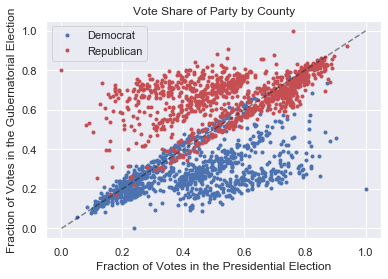

In [730]:
fig,ax = plt.subplots(1,1)
ax.plot(dpgm_dem['p_perc'],dpgm_dem['g_perc'],'.',label='Democrat',c='b')
ax.plot(dpgm_rep['p_perc'],dpgm_rep['g_perc'],'.',label='Republican',c='r')
ax.set_title('Vote Share of Party by County')
ax.set_xlabel('Fraction of Votes in the Presidential Election')
ax.set_ylabel('Fraction of Votes in the Gubernatorial Election')
xlin = np.linspace(0,1,101)
ax.plot(xlin,xlin,'--',c='k',alpha=0.5)
ax.legend();
plt.savefig('VoteShareOverall.jpeg',dpi=300,bbox_inches='tight')

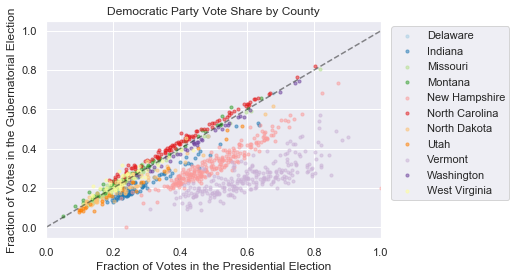

In [740]:
fig, ax = plt.subplots(1,1)
for state in dpgm_dem['state'].unique():
    dstate = dpgm_dem[dpgm_dem['state']==state]   
    ax.scatter(dstate.loc[:,'p_perc'].values,dstate.loc[:,'g_perc'].values,label=state,alpha=0.5,s=10)
ax.legend(loc=1,ncol=1,bbox_to_anchor=(1.4, 1))
ax.set_xlim([0,1])
ax.set_title('Democratic Party Vote Share by County')
ax.set_xlabel('Fraction of Votes in the Presidential Election')
ax.set_ylabel('Fraction of Votes in the Gubernatorial Election')
xlin = np.linspace(0,1,101)
ax.plot(xlin,xlin,'--',c='k',alpha=0.5);
plt.savefig('DemVoteShare.jpeg',dpi=300,bbox_inches='tight')

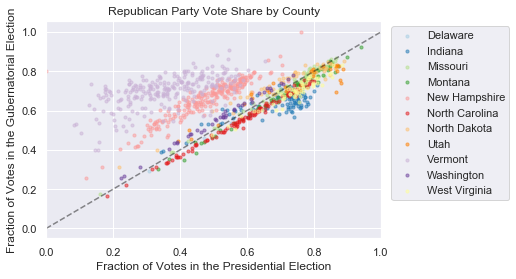

In [741]:
fig, ax = plt.subplots(1,1)
for state in dpgm_rep['state'].unique():
    rstate = dpgm_rep[dpgm_rep['state']==state]
    ax.scatter(rstate.loc[:,'p_perc'].values,rstate.loc[:,'g_perc'].values,label=state,alpha=0.5,s=10)
ax.legend(loc=1,ncol=1,bbox_to_anchor=(1.4, 1))
ax.set_xlim([0,1])
ax.set_title('Republican Party Vote Share by County')
ax.set_xlabel('Fraction of Votes in the Presidential Election')
ax.set_ylabel('Fraction of Votes in the Gubernatorial Election')
xlin = np.linspace(0,1,101)
ax.plot(xlin,xlin,'--',c='k',alpha=0.5);
plt.savefig('RepVoteShare.jpeg',dpi=300,bbox_inches='tight')

In [ ]:
# Let's fit a line to the behavior of individual states to quantify their individual trends.

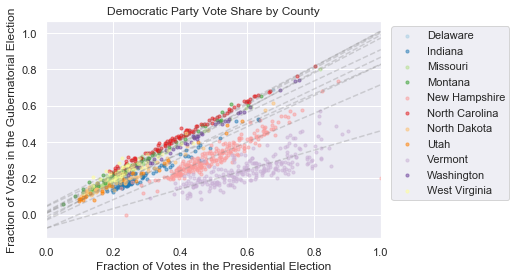

In [746]:
fig, ax = plt.subplots(1,1)
xlin = np.linspace(0,1,101)
StLineFit = pd.DataFrame(columns=['state','m','b','cov','pearson'])
WStLineFit = pd.DataFrame(columns=['state','m','b','cov','pearson'])
for state in dpgm_dem['state'].unique():
    dstate = dpgm_dem[dpgm_dem['state']==state]   
    ax.scatter(dstate.loc[:,'p_perc'].values,dstate.loc[:,'g_perc'].values,label=state,alpha=0.5,s=10)
    p,covar = np.polyfit(dstate.loc[:,'p_perc'].values,dstate.loc[:,'g_perc'].values,1,cov=True)
    pw,covarw = np.polyfit(dstate.loc[:,'p_perc'].values,dstate.loc[:,'g_perc'].values,1,w=dstate.loc[:,'p_tot_county_votes'].values,cov=True)
    m = p[0]
    b = p[1]
    mw = pw[0]
    bw = pw[1]
    pear = corr(dstate.loc[:,'p_perc'].values,dstate.loc[:,'g_perc'].values,np.ones(dstate.shape[0]))
    pearw = corr(dstate.loc[:,'p_perc'].values,dstate.loc[:,'g_perc'].values,dstate.loc[:,'p_tot_county_votes'].values)
    #ThisVal = {'state':state,'m':m,'b':b}
    #ThisStateVals = pd.DataFrame(data=ThisVal,index=0)
    #ThisStateVals = pd.DataFrame([state, m, b], columns=['state','m','b'])
    data = [{'state': state, 'b': b, 'm':m, 'cov':np.sqrt(np.diag(covar)), 'pearson': pear}] 
    dataw = [{'state': state, 'b': bw, 'm':mw, 'cov':np.sqrt(np.diag(covarw)), 'pearson': pearw}] 
    ThisStateVals = pd.DataFrame(data) 
    ThisWStateVals = pd.DataFrame(dataw)
    StLineFit = pd.concat([StLineFit,ThisStateVals])
    WStLineFit = pd.concat([WStLineFit,ThisWStateVals]) 
    ax.plot(xlin,xlin*m+b,'--',c='gray',alpha=0.3);
ax.legend(loc=1,ncol=1,bbox_to_anchor=(1.4, 1))
ax.set_xlim([0,1])
ax.set_title('Democratic Party Vote Share by County')
ax.set_xlabel('Fraction of Votes in the Presidential Election')
ax.set_ylabel('Fraction of Votes in the Gubernatorial Election');
plt.savefig('VoteSharesAllStatesNotWeightedFit.jpeg',dpi=300,bbox_inches='tight')

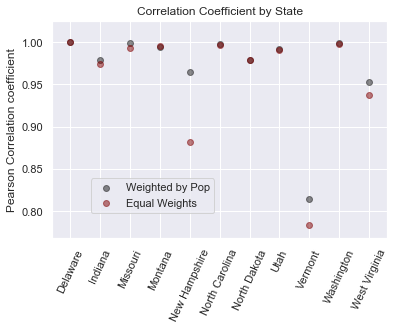

In [752]:
fig, ax = plt.subplots(1,1)
#for state in StLineFit['state']:
    #statevals = WStLineFit[WStLineFit['state']==state]
    #ax.scatter(statevals.loc[:,'m'].values,statevals.loc[:,'b'].values,label=state,alpha=0.5,s=50)
    #plt.errorbar(statevals.loc[:,'m'].values,statevals.loc[:,'b'].values,yerr=statevals.loc[:,'cov'].values[0][1] ,xerr=statevals.loc[:,'cov'].values[0][0], linestyle="None")
ax.scatter(StLineFit['state'].values,WStLineFit['pearson'].values,label='Weighted by Pop',alpha=0.5,c='k')
ax.scatter(StLineFit['state'].values,StLineFit['pearson'].values,label='Equal Weights',alpha=0.5,c='maroon')
ax.set_ylabel('Pearson Correlation coefficient')
ax.set_title('Correlation Coefficient by State');
plt.xticks(rotation=65);
ax.legend(loc=1,ncol=1,bbox_to_anchor=(0.5, 0.3))
plt.savefig('PearsonCorrVals.jpeg',dpi=300,bbox_inches='tight')


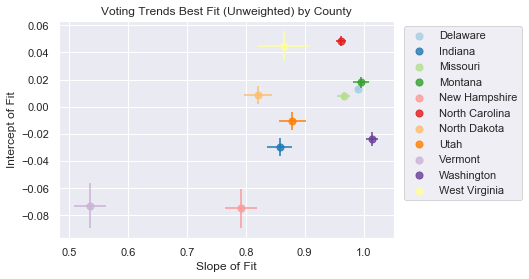

In [751]:
fig, ax = plt.subplots(1,1)
for state in StLineFit['state']:
    statevals = StLineFit[StLineFit['state']==state]
    ax.scatter(statevals.loc[:,'m'].values,statevals.loc[:,'b'].values,label=state,alpha=0.8,s=50)
    ax.errorbar(statevals.loc[:,'m'].values,statevals.loc[:,'b'].values,yerr=statevals.loc[:,'cov'].values[0][1],xerr=statevals.loc[:,'cov'].values[0][0])
ax.legend(loc=1,ncol=1,bbox_to_anchor=(1.4,1));
ax.set_xlabel('Slope of Fit')
ax.set_ylabel('Intercept of Fit')
ax.set_title('Voting Trends Best Fit (Unweighted) by County');
plt.savefig('BestFitParamsNW.jpeg',dpi=300,bbox_inches='tight')

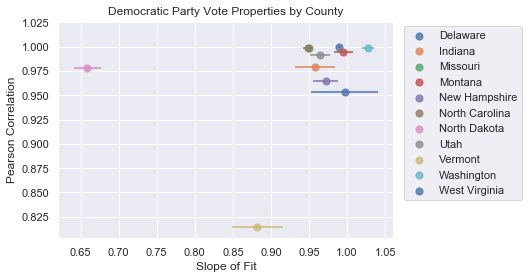

In [589]:
fig, ax = plt.subplots(1,1)
for state in StLineFit['state']:
    wstatevals = WStLineFit[WStLineFit['state']==state]
    ax.scatter(wstatevals.loc[:,'m'].values,wstatevals.loc[:,'pearson'].values,alpha=0.8,s=50,label=state)
    ax.errorbar(wstatevals.loc[:,'m'].values,wstatevals.loc[:,'pearson'].values,xerr=wstatevals.loc[:,'cov'].values[0][0])
ax.legend(loc=1,ncol=1,bbox_to_anchor=(1.4,1));
ax.set_xlabel('Slope of Fit')
ax.set_ylabel('Pearson Correlation')
ax.set_title('Democratic Party Vote Properties by County');

In [ ]:
# Is there a relationship between population size per county and voting behavior?

In [618]:
StLineFit[StLineFit['state']=='Washington'].loc[:,'m'].values

array([1.01436235])

No handles with labels found to put in legend.


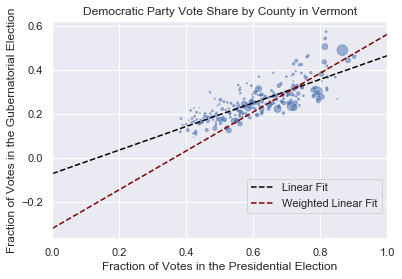

In [753]:
fig, ax = plt.subplots(1,1)
xlin = np.linspace(0,1,101)
thisstate='Vermont'
dstate = dpgm_dem[dpgm_dem['state']==thisstate]
#rstate = dpgm_rep[dpgm_rep['state']=='Washington']
#    ax.plot(dstate.loc[:,'p_perc'].values,dstate.loc[:,'g_perc'].values,'.',label=state,alpha=0.5,s=dstate.loc[:,'p_tot_county_votes'].values)
ax.scatter(dstate.loc[:,'p_perc'].values,dstate.loc[:,'g_perc'].values,alpha=0.5,s=dstate.loc[:,'p_tot_county_votes'].values/200,c='b')
#ax.scatter(rstate.loc[:,'p_perc'].values,rstate.loc[:,'g_perc'].values,label='Republican',alpha=0.5,s=rstate.loc[:,'p_tot_county_votes'].values/5000)
ax.legend(loc=1,ncol=1,bbox_to_anchor=(1, 0.3))
ax.set_xlim([0,1])
ax.set_title('Democratic Party Vote Share by County in Vermont')
ax.set_xlabel('Fraction of Votes in the Presidential Election')
ax.set_ylabel('Fraction of Votes in the Gubernatorial Election')
ax.plot(xlin,xlin*StLineFit[StLineFit['state']==thisstate].loc[:,'m'].values+StLineFit[StLineFit['state']==thisstate].loc[:,'b'].values,'--',c='black',label='Linear Fit');
ax.plot(xlin,xlin*WStLineFit[WStLineFit['state']==thisstate].loc[:,'m'].values+WStLineFit[WStLineFit['state']==thisstate].loc[:,'b'].values,'--',c='maroon',label='Weighted Linear Fit');
ax.legend(loc=1,ncol=1,bbox_to_anchor=(1, 0.3))
plt.savefig('VermontTrend.jpeg',dpi=300,bbox_inches='tight')




No handles with labels found to put in legend.


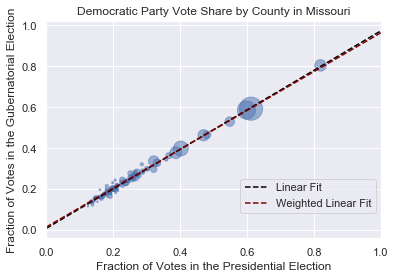

In [743]:
fig, ax = plt.subplots(1,1)
xlin = np.linspace(0,1,101)
thisstate='Missouri'
dstate = dpgm_dem[dpgm_dem['state']==thisstate]
#rstate = dpgm_rep[dpgm_rep['state']=='Washington']
#    ax.plot(dstate.loc[:,'p_perc'].values,dstate.loc[:,'g_perc'].values,'.',label=state,alpha=0.5,s=dstate.loc[:,'p_tot_county_votes'].values)
ax.scatter(dstate.loc[:,'p_perc'].values,dstate.loc[:,'g_perc'].values,alpha=0.5,s=dstate.loc[:,'p_tot_county_votes'].values/1000,c='b')
#ax.scatter(rstate.loc[:,'p_perc'].values,rstate.loc[:,'g_perc'].values,label='Republican',alpha=0.5,s=rstate.loc[:,'p_tot_county_votes'].values/5000)
ax.legend(loc=1,ncol=1,bbox_to_anchor=(1, 0.3))
ax.set_xlim([0,1])
ax.set_title('Democratic Party Vote Share by County in Missouri')
ax.set_xlabel('Fraction of Votes in the Presidential Election')
ax.set_ylabel('Fraction of Votes in the Gubernatorial Election')
ax.plot(xlin,xlin*StLineFit[StLineFit['state']==thisstate].loc[:,'m'].values+StLineFit[StLineFit['state']==thisstate].loc[:,'b'].values,'--',c='black',label='Linear Fit');
ax.plot(xlin,xlin*WStLineFit[WStLineFit['state']==thisstate].loc[:,'m'].values+WStLineFit[WStLineFit['state']==thisstate].loc[:,'b'].values,'--',c='maroon',label='Weighted Linear Fit');
ax.legend(loc=1,ncol=1,bbox_to_anchor=(1, 0.3))
plt.savefig('MissouriTrend.jpeg',dpi=300,bbox_inches='tight')


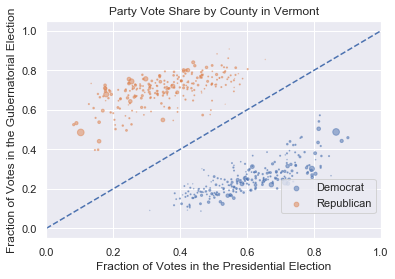

In [597]:
fig, ax = plt.subplots(1,1)
dstate = dpgm_dem[dpgm_dem['state']=='Vermont']
rstate = dpgm_rep[dpgm_rep['state']=='Vermont']
#    ax.plot(dstate.loc[:,'p_perc'].values,dstate.loc[:,'g_perc'].values,'.',label=state,alpha=0.5,s=dstate.loc[:,'p_tot_county_votes'].values)
ax.scatter(dstate.loc[:,'p_perc'].values,dstate.loc[:,'g_perc'].values,label='Democrat',alpha=0.5,s=dstate.loc[:,'p_tot_county_votes'].values/500)
ax.scatter(rstate.loc[:,'p_perc'].values,rstate.loc[:,'g_perc'].values,label='Republican',alpha=0.5,s=rstate.loc[:,'p_tot_county_votes'].values/500)
ax.legend(loc=1,ncol=1,bbox_to_anchor=(1, 0.3))
ax.set_xlim([0,1])
ax.set_title('Party Vote Share by County in Vermont')
ax.set_xlabel('Fraction of Votes in the Presidential Election')
ax.set_ylabel('Fraction of Votes in the Gubernatorial Election')
xlin = np.linspace(0,1,101)
ax.plot(xlin,xlin,'--');

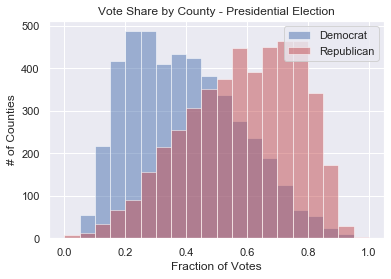

In [738]:
df = PresVotes()
fig, ax = plt.subplots(1,1)
df[df['party']=='DEM'].loc[:,'perc'].hist(alpha=0.5,label='Democrat',bins=20,facecolor='b')
df[df['party']=='REP'].loc[:,'perc'].hist(alpha=0.5,label='Republican',bins=20,facecolor='r')
ax.legend()
ax.set_title('Vote Share by County - Presidential Election');
ax.set_xlabel('Fraction of Votes')
ax.set_ylabel('# of Counties')
plt.savefig('PresidentialVoteShareCountyNW.jpeg',dpi=300,bbox_inches='tight')

In [70]:
# The above graph shows that the Republican Party got a higher percentage of the votes in many more counties.
# When a weight proportional to the number of votes in each county is added, the graphs shift dramatically.

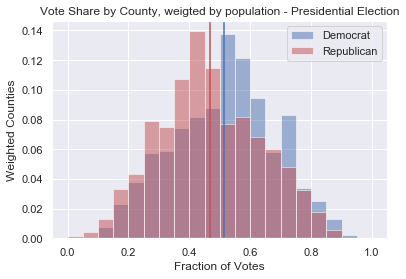

In [739]:
df = PresVotes()
dfdem = df[df['party']=='DEM']
y = dfdem.loc[:,'perc']
w = dfdem.loc[:,'tot_county_votes']
v = dfdem.loc[:,'total_votes']
fig, ax = plt.subplots(1,1)
ax.hist(y,weights=w/np.nansum(w),alpha=0.5,label='Democrat',bins=20,facecolor='b')
ax.axvline(x=np.nansum(v)/np.nansum(w),color='b')
dfrep = df[df['party']=='REP']
y = dfrep.loc[:,'perc']
w = dfrep.loc[:,'tot_county_votes']
v = dfrep.loc[:,'total_votes']
ax.hist(y,weights=w/np.nansum(w),alpha=0.5,label='Republican',bins=20,facecolor='r')
ax.axvline(x=np.nansum(v)/np.nansum(w),color='r')
ax.set_title('Vote Share by County, weigted by population - Presidential Election');
ax.set_xlabel('Fraction of Votes')
ax.set_ylabel('Weighted Counties')
ax.legend();

plt.savefig('PresidentialVoteShareCountyPW.jpeg',dpi=300,bbox_inches='tight')

In [81]:
# Now it is clear that Joe Biden got a higher percentage of the votes when the populations of the counties are weighted.
# The vertical lines denote the average percentage of votes received by each party.